<a href="https://www.kaggle.com/code/damianlewandowski7/titanic-v1?scriptVersionId=130531887" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_info = {'Variable': ['survival','pclass', 'sex', 'Age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked'] ,
        'Definition': ['Survival', 'Ticket class', 'Sex', 'Age in years', '# of siblings / spouses aboard the Titanic', 
                      '# of parents / children aboard the Titanic', 'Ticket number', 'Passenger fare', 'Cabin number', 'Port of Embarkation'],
       'Key': ['0=No, 1=Yes', '1=1st, 2=2nd, 3=3rd', '-', '-', '-', '-', '-', '-', '-', 'C = Cherbourg, Q = Queenstown, S = Southampton']}

df_info = pd.DataFrame(df_info)
df_info

,Variable,Definition,Key
0,survival,Survival,"0=No, 1=Yes"
1,pclass,Ticket class,"1=1st, 2=2nd, 3=3rd"
2,sex,Sex,-
3,Age,Age in years,-
4,sibsp,# of siblings / spouses aboard the Titanic,-
5,parch,# of parents / children aboard the Titanic,-
6,ticket,Ticket number,-
7,fare,Passenger fare,-
8,cabin,Cabin number,-
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train = pd.read_csv(r'/kaggle/input/titanic/train.csv')
test = pd.read_csv(r'/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's look on label 'Survived'

In [5]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Let's examine relationship between survivors and non-survivors

In [6]:
count_survived = [x for x in train['Survived'] if x == 1]
count_no_survived = [x for x in train['Survived'] if x == 0]

len(count_survived) / len(count_no_survived)


0.6229508196721312

What this number above say?
Lets around it to 0.6 = $\frac{6}{10}$\
Survivors $\frac{6}{16} = \frac{3}{8}$ this mean we have only 3 survivors on 8 people\
Non-survivors $\frac{5}{8}$ this mean we have only 5 no-survivors on 8 people

May we find information in our data how to survived on titanic? Keep on! 

We'll examine relationship label 'survived' with each column in dataset.\
On first look we take 'sex'.

In [7]:
train[['Survived', 'Sex']].head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


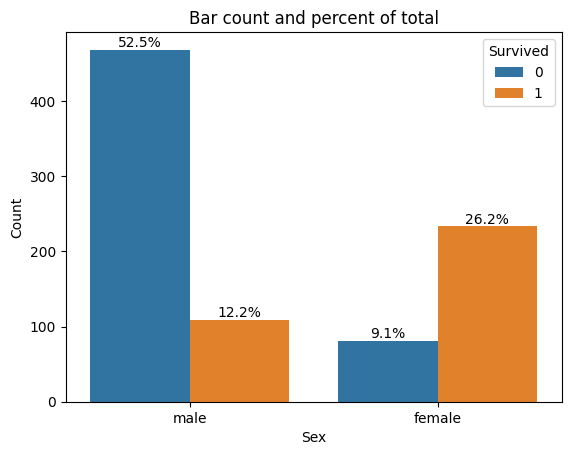

In [8]:
ax = sns.countplot(data=train, x='Sex', hue='Survived')
ax.set(ylabel='Count', title='Bar count and percent of total')
for c in ax.containers:
    labels = [f'{h/train.Survived.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

Let's look closer on 'male' 
We see 52.5% people of sex male not survived if we compare it to sex female this issue looks only 9.1% of total population people on Titanic not survived.

Let's look on Pie Chart to visualize in another way. 

In [9]:
train['Sex'] = train['Sex'].replace('male', 0).replace('female', 1)
test['Sex'] = test['Sex'].replace('male', 0).replace('female', 1)
male = train[train['Sex'] == 0] 
female = train[train['Sex'] == 1] 

In [10]:
female_survived = female[female['Survived'] == 1]
female_non_survived = female[female['Survived'] == 0]
male_survived = male[male['Survived'] == 1]
male_non_survived = male[male['Survived'] == 0]


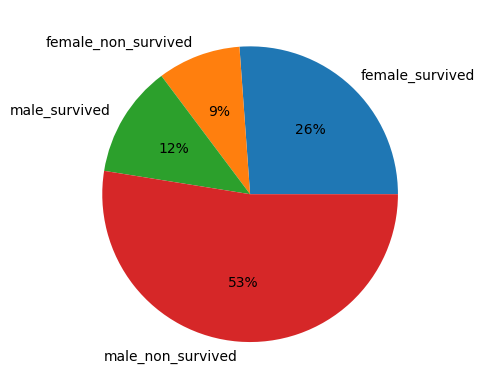

In [11]:
data = [len(female_survived), len(female_non_survived), len(male_survived), len(male_non_survived)]
labels = ['female_survived', 'female_non_survived', 'male_survived', 'male_non_survived']
plt.pie(data, labels=labels, autopct='%.0f%%')
plt.show()

Visualization above give information about half men no matter on age not survived on titanic.\
So far we achieve basic information about relationship between 'Survival' and 'Sex'.\
We change feature 'Sex' to categorical where male is 0 and female is 1

**Let's examine new relationship between features 'Survived' and  'Name'**

In [12]:
train[['Survived', 'Name']].head()

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,1,"Heikkinen, Miss. Laina"
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,0,"Allen, Mr. William Henry"


In [13]:
train['Name'].head().unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry'], dtype=object)

In [14]:
train['Name'] = train['Name'].replace(to_replace='.*(Mr\.).*', value='Mr', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Mrs\.).*', value='Mrs', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Miss\.).*', value='Miss', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Lady\.).*', value='Lady', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Master\.).*', value='Master', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Dr\.).*', value='Dr', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Rev\.).*', value='Rev', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Major\.).*', value='Major', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Capt\.).*', value='Capt', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Sir\.).*', value='Sir', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Ms\.).*', value='Ms', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Mile\.).*', value='Mile', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Don\.).*', value='Don', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Mme\.).*', value='Mme', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Col\.).*', value='Col', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Jonkheer\.).*', value='Jonkheer', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Countess\.).*', value='Countess', regex=True)
train['Name'] = train['Name'].replace(to_replace='.*(Mlle\.).*', value='Mlle', regex=True)

test['Name'] = test['Name'].replace(to_replace='.*(Mr\.).*', value='Mr', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Mrs\.).*', value='Mrs', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Miss\.).*', value='Miss', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Master\.).*', value='Master', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Dr\.).*', value='Dr', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Rev\.).*', value='Rev', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Major\.).*', value='Major', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Capt\.).*', value='Capt', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Sir\.).*', value='Sir', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Ms\.).*', value='Ms', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Mile\.).*', value='Mile', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Don\.).*', value='Don', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Mme\.).*', value='Mme', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Col\.).*', value='Col', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Jonkheer\.).*', value='Jonkheer', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Countess\.).*', value='Countess', regex=True)
test['Name'] = test['Name'].replace(to_replace='.*(Mlle\.).*', value='Mlle', regex=True)


In [15]:
print(train['Name'].unique())
print(len(train['Name'].unique()))

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']
17


Let's look on relation between class e.g (Mr, Mrs) on cruise and which one the most frequently survived this crashed.

In [16]:
train[['Survived', 'Name']]

,Survived,Name
0,0,Mr
1,1,Mrs
2,1,Miss
3,1,Mrs
4,0,Mr
...,...,...
886,0,Rev
887,1,Miss
888,0,Miss
889,1,Mr


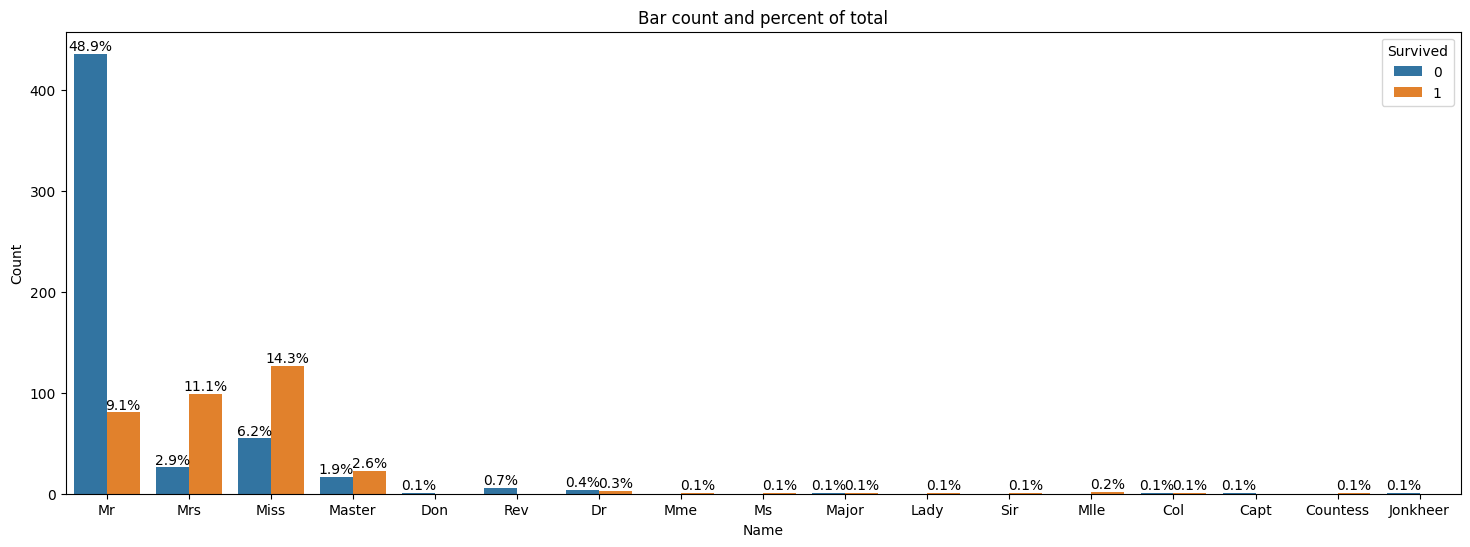

In [17]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=train, x='Name', hue='Survived')
ax.set(ylabel='Count', title='Bar count and percent of total')
for c in ax.containers:
    labels = [f'{h/train.Survived.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

People which belong to class Mr most of this people not survived\
People which belong to class 'Miss' has the higher indicator of survived\
We find some group like Don, Rev, Captain Jonkheer where nobody survived

**Convert Name to categorical variable**

In [18]:
dict_name = {x: i for i, x in enumerate(train['Name'].unique())} 
dict_name

{'Mr': 0,
 'Mrs': 1,
 'Miss': 2,
 'Master': 3,
 'Don': 4,
 'Rev': 5,
 'Dr': 6,
 'Mme': 7,
 'Ms': 8,
 'Major': 9,
 'Lady': 10,
 'Sir': 11,
 'Mlle': 12,
 'Col': 13,
 'Capt': 14,
 'Countess': 15,
 'Jonkheer': 16}

In [19]:
train['Name'] = train['Name'].map(dict_name)
test['Name'] = test['Name'].map(dict_name)

Examine relationship between 'Survived' and 'Pclass'

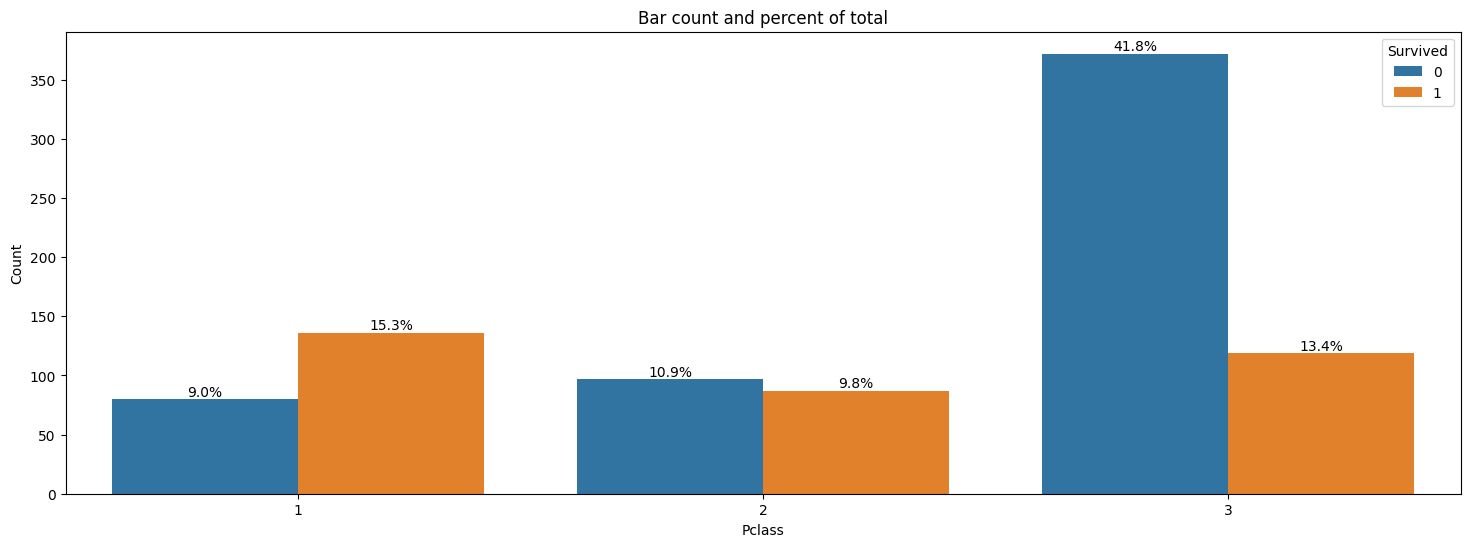

In [20]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=train, x='Pclass', hue='Survived')
ax.set(ylabel='Count', title='Bar count and percent of total')
for c in ax.containers:
    labels = [f'{h/train.Survived.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

In [21]:
print(train[['Survived', 'Pclass']].isnull().count())

print(test['Pclass'].info())

Survived    891
Pclass      891
dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
418 non-null    int64
dtypes: int64(1)
memory usage: 3.4 KB
None


Series Pclass is categorical, so move forward\
Examine now relationship between 'Survived' and 'Age'

In [22]:
train[['Survived', 'Age']].head()

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [23]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
train['Age'].isnull().values.any()

True

In [25]:
train['Age'].isnull().sum()

177

In [26]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

train['age_bins'] = pd.cut(train['Age'], bins, labels=labels, include_lowest=True)

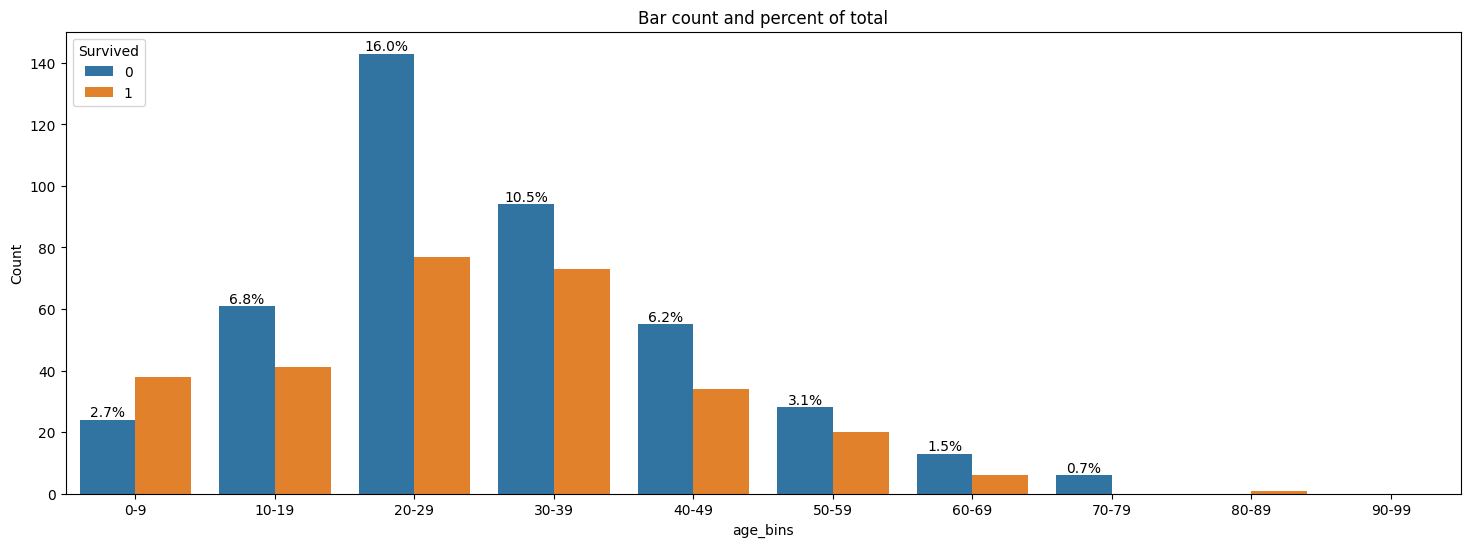

In [27]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=train, x='age_bins', hue='Survived')
ax.set(ylabel='Count', title='Bar count and percent of total')
for c in ax.containers:
    labels = [f'{h/train.Survived.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    plt.show()



What it is '-1'? It is lack of information about age. How we solve this issue? Base on other variables we assume age. Move on!\
Any idea? Let's look one again on meaning variables!

In [28]:
df_info

,Variable,Definition,Key
0,survival,Survival,"0=No, 1=Yes"
1,pclass,Ticket class,"1=1st, 2=2nd, 3=3rd"
2,sex,Sex,-
3,Age,Age in years,-
4,sibsp,# of siblings / spouses aboard the Titanic,-
5,parch,# of parents / children aboard the Titanic,-
6,ticket,Ticket number,-
7,fare,Passenger fare,-
8,cabin,Cabin number,-
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


We use model Random forest regressor in this section to predict the missing age values

In [29]:
test['Name'][414] = 0 # missing value in dataset, rfr not tackle with missing values so we randomly assume value 0
test['Name'][414]

/tmp/ipykernel_20/2183113393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Name'][414] = 0 # missing value in dataset, rfr not tackle with missing values so we randomly assume value 0


0.0

In [30]:
from sklearn.ensemble import RandomForestRegressor

def rfr_age(df):
    age_df = df.loc[:, ['Pclass', 'Name', 'Sex', 'SibSp', 'Parch', 'Age']]
    # print(age_df)
    temp_train = age_df.loc[age_df.Age.notnull()] # with age val
    temp_test = age_df.loc[age_df.Age.isnull()].drop('Age', axis=1) # without age val

    y = temp_train.Age.values
    X = temp_train.loc[:, ['Pclass', 'Name', 'Sex', 'SibSp', 'Parch']].values

    rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1)
    rfr.fit(X,  y)
    predicted = rfr.predict(temp_test)
    
    df.loc[df.Age.isnull(), 'Age'] = predicted
    
    return df

rfr_age(train)
rfr_age(test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,0.0,0,34.500000,0,0,330911,7.8292,NaN,Q
1,893,3,1.0,1,47.000000,1,0,363272,7.0000,NaN,S
2,894,2,0.0,0,62.000000,0,0,240276,9.6875,NaN,Q
3,895,3,0.0,0,27.000000,0,0,315154,8.6625,NaN,S
4,896,3,1.0,1,22.000000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0.0,0,26.608584,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,0.0,1,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,0.0,0,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,0.0,0,26.608584,0,0,359309,8.0500,NaN,S


Let's look one again 

In [31]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

train['age_bins'] = pd.cut(train['Age'], bins, labels=labels, include_lowest=True)

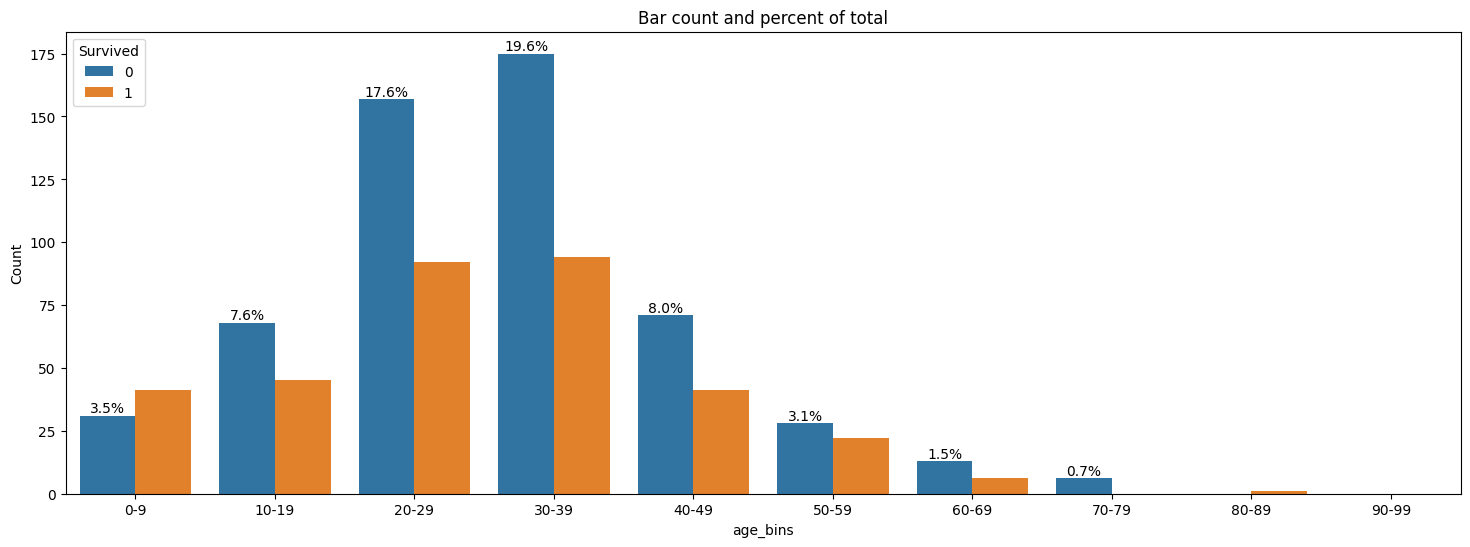

In [32]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=train, x='age_bins', hue='Survived')
ax.set(ylabel='Count', title='Bar count and percent of total')
for c in ax.containers:
    labels = [f'{h/train.Survived.count()*100:0.1f}%' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    plt.show()

So far, we tackled with missing values in series 'Age' and we solved this problem. All is destiny! 

In [33]:
df_info

,Variable,Definition,Key
0,survival,Survival,"0=No, 1=Yes"
1,pclass,Ticket class,"1=1st, 2=2nd, 3=3rd"
2,sex,Sex,-
3,Age,Age in years,-
4,sibsp,# of siblings / spouses aboard the Titanic,-
5,parch,# of parents / children aboard the Titanic,-
6,ticket,Ticket number,-
7,fare,Passenger fare,-
8,cabin,Cabin number,-
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In next step we explore relationship between varible 'Ticket' and 'Survived'.

In [34]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012